In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


if not os.path.exists("figures"):
    os.makedirs("figures")

In [31]:
def heaps_law(N, k, beta):
    return k * (N ** beta)

def zipfs_law(rank, k, alpha):
    return k / (rank ** alpha)

file_path = "/Users/tiananoll-walker/Documents/biotokens/used_code/full_outputcomp.csv"
df = pd.read_csv(file_path)    

vocab 500.0: k = 449.0035, β = 0.0022
vocab 1000.0: k = 902.3853, β = 0.0019
vocab 5000.0: k = 4438.9863, β = 0.0037
vocab 10000.0: k = 8868.5339, β = 0.0041


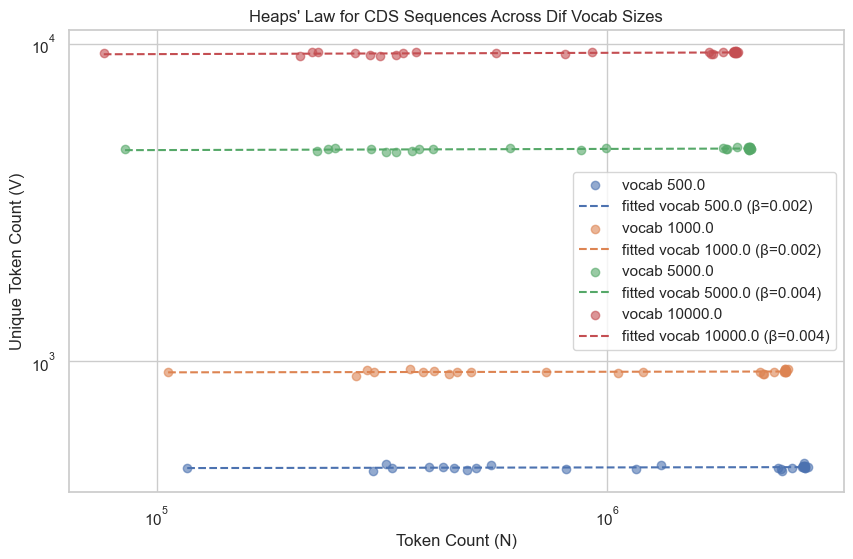


Fitted Heaps' Law Parameters by Vocab Size:
Vocab 500.0: k = 449.0035, β = 0.0022
Vocab 1000.0: k = 902.3853, β = 0.0019
Vocab 5000.0: k = 4438.9863, β = 0.0037
Vocab 10000.0: k = 8868.5339, β = 0.0041


In [32]:
vocab_sizes = df["Vocab Size"].unique()
vocab_sizes.sort()

fitted_params = {}

plt.figure(figsize=(10, 6))

for vocab_size in vocab_sizes:
    cds_df = df[(df["File Type"] == "cds") & (df["Vocab Size"] == vocab_size)]
    
    if len(cds_df) < 2:
        continue  

    token_counts = cds_df["Token Count"].values
    unique_token_counts = cds_df["Unique Token Count"].values

    try:
        popt, _ = curve_fit(heaps_law, token_counts, unique_token_counts, maxfev=5000)
        k_fitted, beta_fitted = popt
        fitted_params[vocab_size] = (k_fitted, beta_fitted)

        x_vals = np.linspace(min(token_counts), max(token_counts), 100)
        y_vals = heaps_law(x_vals, k_fitted, beta_fitted)

        plt.scatter(token_counts, unique_token_counts, alpha=0.6, label=f"vocab {vocab_size}")
        plt.plot(x_vals, y_vals, linestyle="--", label=f"fitted vocab {vocab_size} (β={beta_fitted:.3f})")

        print(f"vocab {vocab_size}: k = {k_fitted:.4f}, β = {beta_fitted:.4f}")

    except Exception as e:
        print(f"error fitting heaps law for vocab {vocab_size}: {e}")

plt.xlabel("Token Count (N)")
plt.ylabel("Unique Token Count (V)")
plt.title("Heaps' Law for CDS Sequences Across Dif Vocab Sizes")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.show()

print("\nFitted Heaps' Law Parameters by Vocab Size:")
for vocab, (k, beta) in fitted_params.items():
    print(f"Vocab {vocab}: k = {k:.4f}, β = {beta:.4f}")

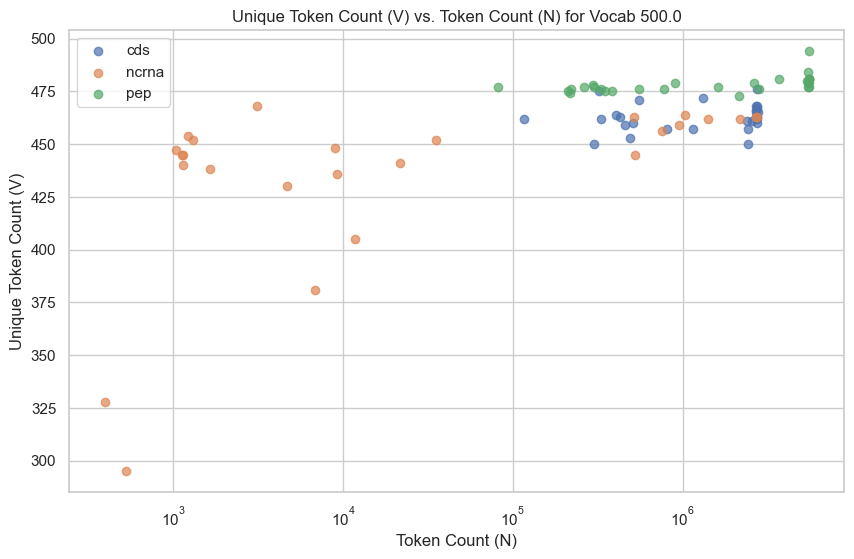

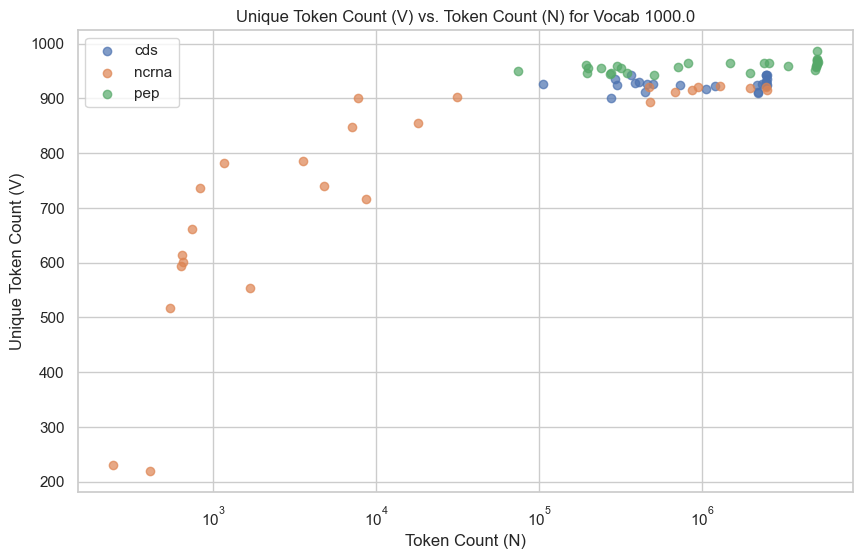

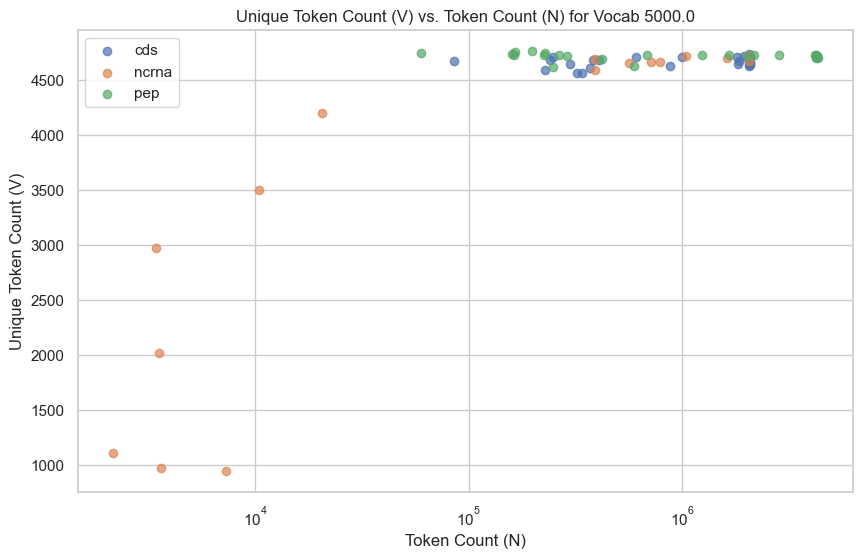

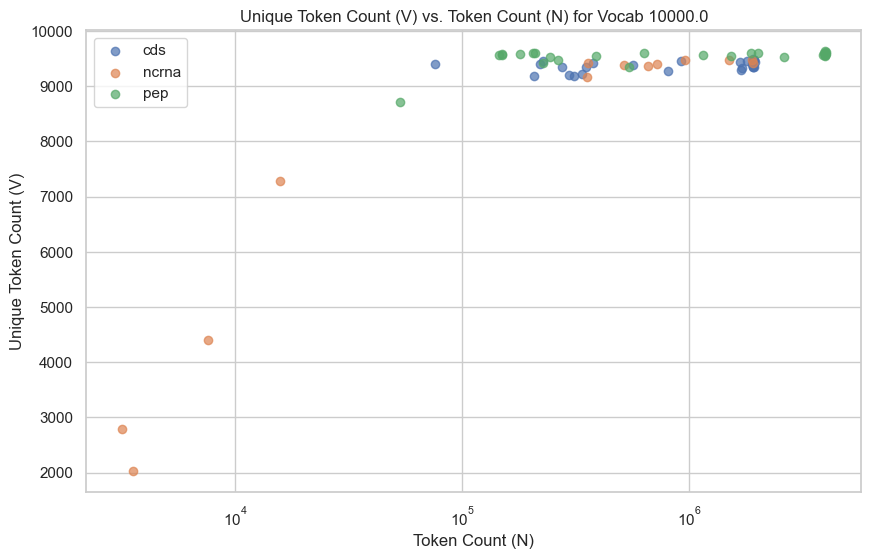

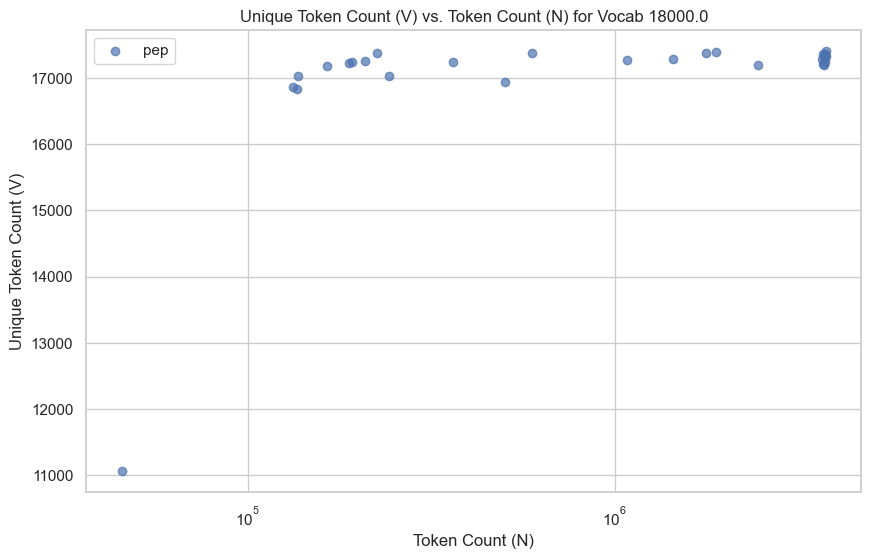

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


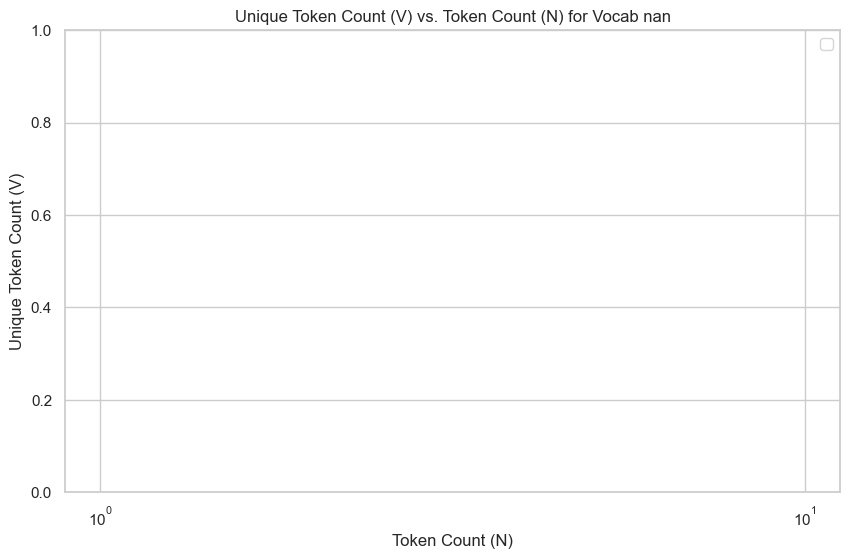

In [33]:

file_types = ['cds', 'ncrna', 'pep']
vocab_sizes = df["Vocab Size"].unique()
vocab_sizes.sort()

for vocab_size in vocab_sizes:
    plt.figure(figsize=(10, 6))
    
    for file_type in file_types:
        subset = df[(df["File Type"] == file_type) & (df["Vocab Size"] == vocab_size)]
        
        if subset.empty:
            continue  
        
        plt.scatter(subset["Token Count"], subset["Unique Token Count"], label=file_type, alpha=0.7)
    
    plt.xscale("log")
    #plt.yscale("log")
    plt.xlabel("Token Count (N)")
    plt.ylabel("Unique Token Count (V)")
    plt.title(f"Unique Token Count (V) vs. Token Count (N) for Vocab {vocab_size}")
    plt.legend()
    plt.grid(True)
    plt.show()

Vocab 500.0 (cds): k = 449.0035, β = 0.0022
Vocab 500.0 (ncrna): k = 374.2923, β = 0.0151
Vocab 500.0 (pep): k = 457.0104, β = 0.0032


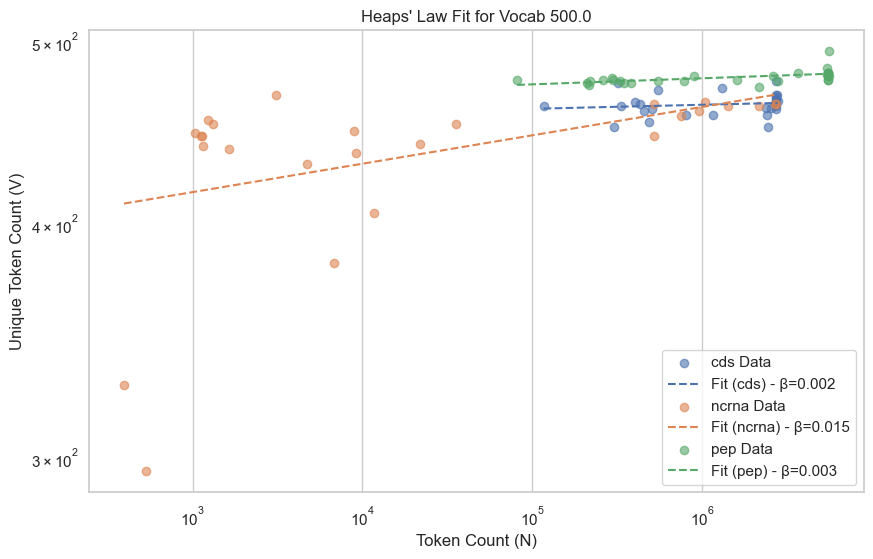

Vocab 1000.0 (cds): k = 902.3853, β = 0.0019
Vocab 1000.0 (ncrna): k = 414.4748, β = 0.0590
Vocab 1000.0 (pep): k = 899.3917, β = 0.0046


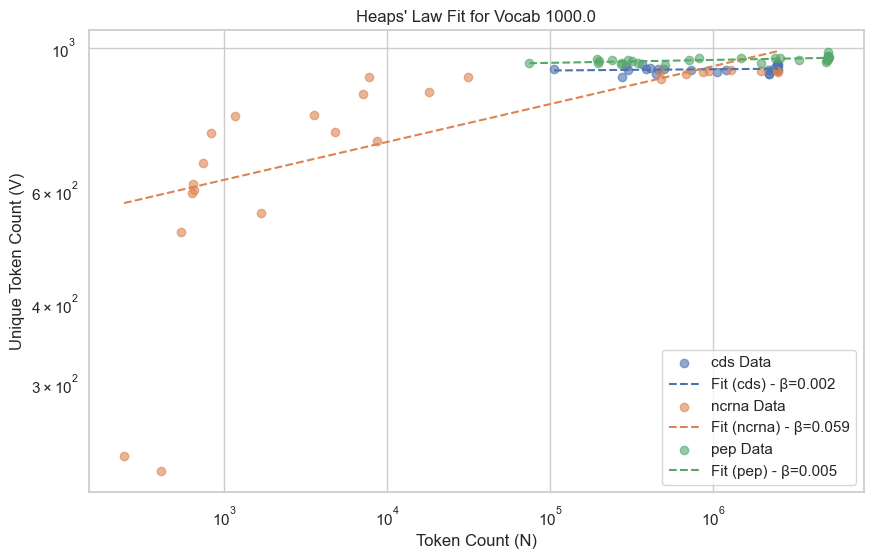

Vocab 5000.0 (cds): k = 4438.9863, β = 0.0037
Vocab 5000.0 (ncrna): k = 719.9009, β = 0.1358
Vocab 5000.0 (pep): k = 4765.2879, β = -0.0007


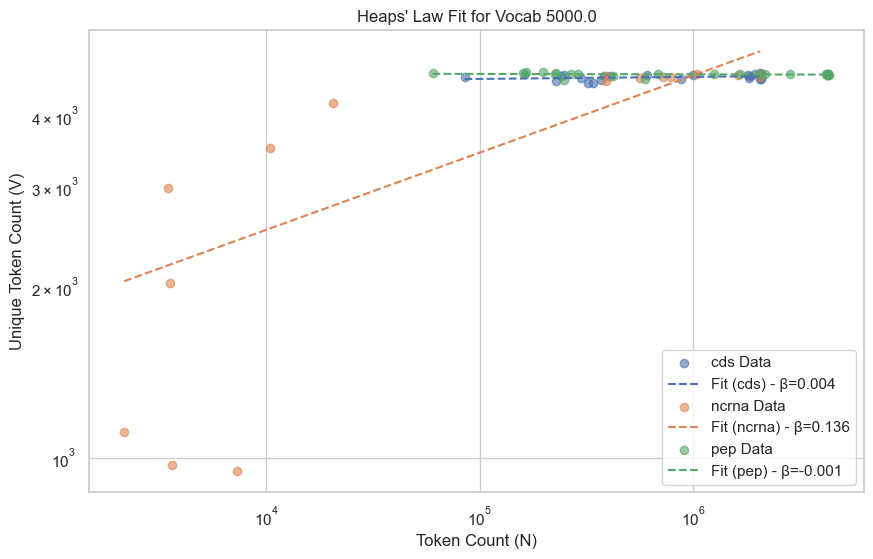

Vocab 10000.0 (cds): k = 8868.5339, β = 0.0041
Vocab 10000.0 (ncrna): k = 1260.3814, β = 0.1463
Vocab 10000.0 (pep): k = 8787.8056, β = 0.0059


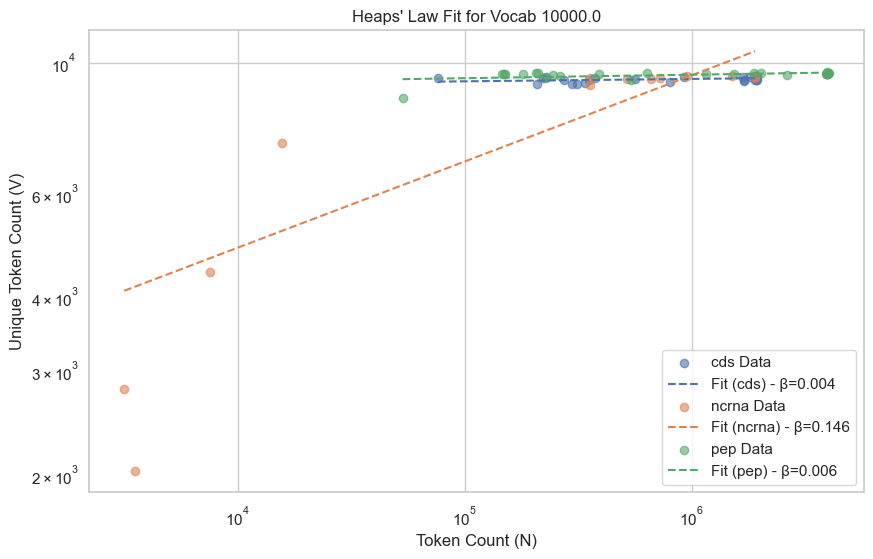

Vocab 18000.0 (pep): k = 12702.7377, β = 0.0214


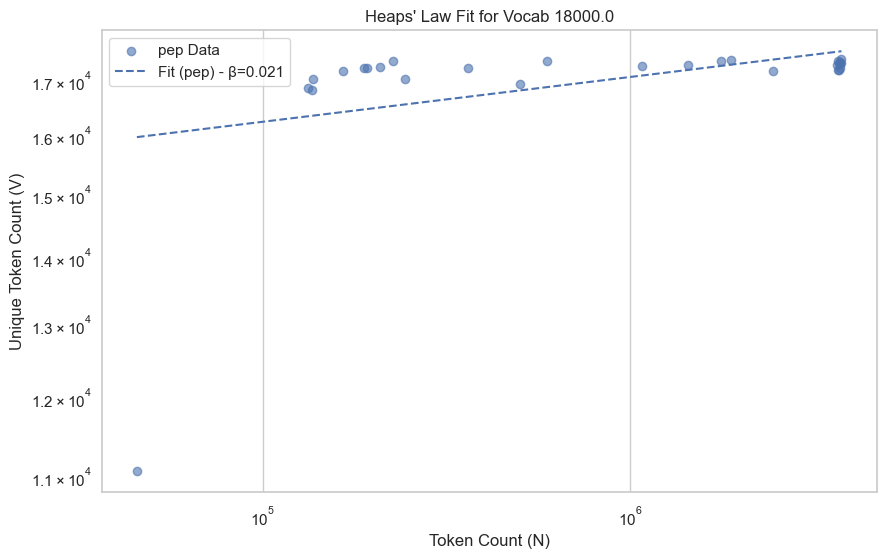

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


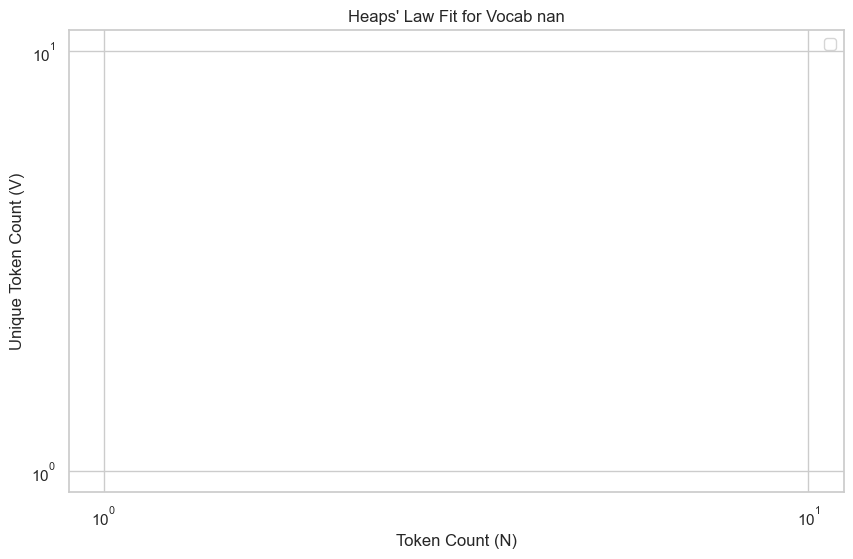


Fitted Heaps' Law Parameters by Vocab Size:
Vocab 500.0 (cds): k = 449.0035, β = 0.0022
Vocab 500.0 (ncrna): k = 374.2923, β = 0.0151
Vocab 500.0 (pep): k = 457.0104, β = 0.0032
Vocab 1000.0 (cds): k = 902.3853, β = 0.0019
Vocab 1000.0 (ncrna): k = 414.4748, β = 0.0590
Vocab 1000.0 (pep): k = 899.3917, β = 0.0046
Vocab 5000.0 (cds): k = 4438.9863, β = 0.0037
Vocab 5000.0 (ncrna): k = 719.9009, β = 0.1358
Vocab 5000.0 (pep): k = 4765.2879, β = -0.0007
Vocab 10000.0 (cds): k = 8868.5339, β = 0.0041
Vocab 10000.0 (ncrna): k = 1260.3814, β = 0.1463
Vocab 10000.0 (pep): k = 8787.8056, β = 0.0059
Vocab 18000.0 (pep): k = 12702.7377, β = 0.0214


In [34]:

fitted_params = {}

for vocab_size in vocab_sizes:
    plt.figure(figsize=(10, 6))
    
    for file_type in ['cds', 'ncrna', 'pep']:
        subset = df[(df["File Type"] == file_type) & (df["Vocab Size"] == vocab_size)]
        
        if len(subset) < 2:
            continue  
        
        N = subset["Token Count"].values
        V = subset["Unique Token Count"].values
        
        try:
            popt, _ = curve_fit(heaps_law, N, V, maxfev=5000)
            k_fitted, beta_fitted = popt
            fitted_params[(vocab_size, file_type)] = (k_fitted, beta_fitted)

            x_vals = np.linspace(min(N), max(N), 100)
            y_vals = heaps_law(x_vals, k_fitted, beta_fitted)

            plt.scatter(N, V, alpha=0.6, label=f"{file_type} Data")
            plt.plot(x_vals, y_vals, linestyle="--", label=f"Fit ({file_type}) - β={beta_fitted:.3f}")

            print(f"Vocab {vocab_size} ({file_type}): k = {k_fitted:.4f}, β = {beta_fitted:.4f}")
        
        except Exception as e:
            print(f"Error fitting Heaps' Law for vocab {vocab_size} ({file_type}): {e}")

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Token Count (N)")
    plt.ylabel("Unique Token Count (V)")
    plt.title(f"Heaps' Law Fit for Vocab {vocab_size}")
    plt.legend()
    plt.grid(True)
    plt.show()

print("\nFitted Heaps' Law Parameters by Vocab Size:")
for (vocab, file_type), (k, beta) in fitted_params.items():
    print(f"Vocab {vocab} ({file_type}): k = {k:.4f}, β = {beta:.4f}")

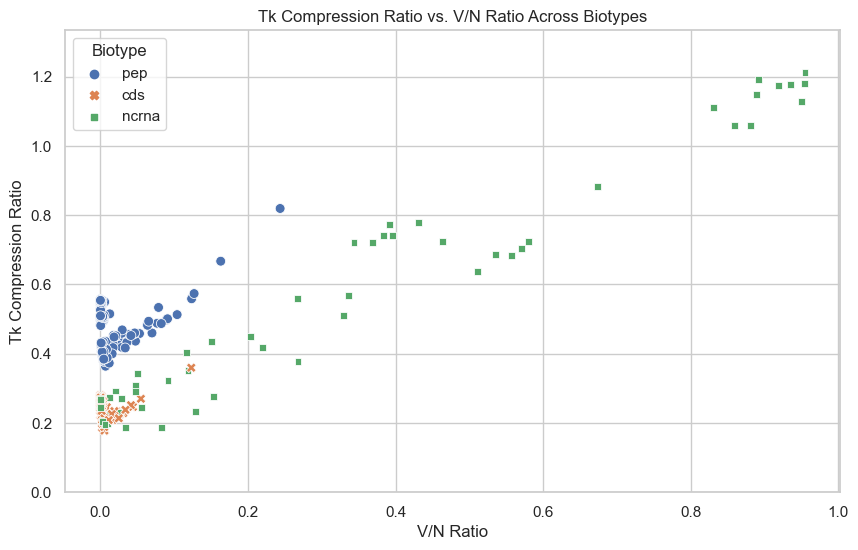

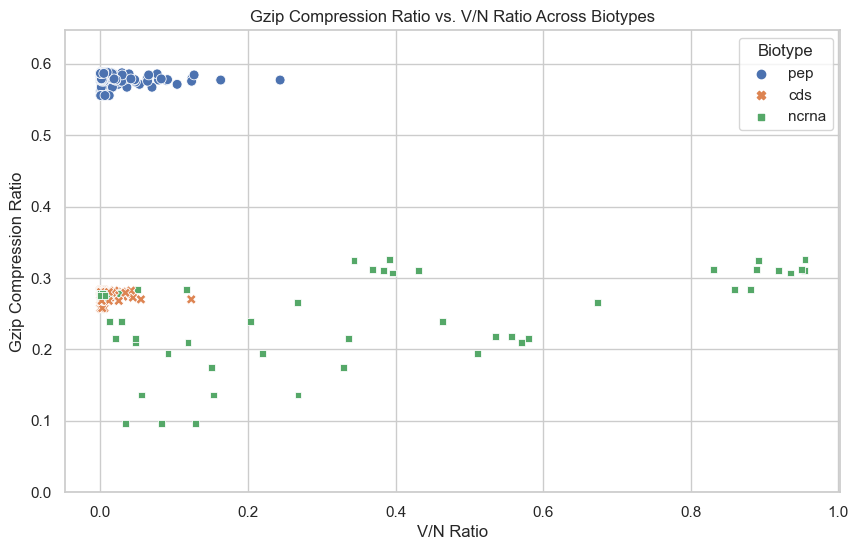

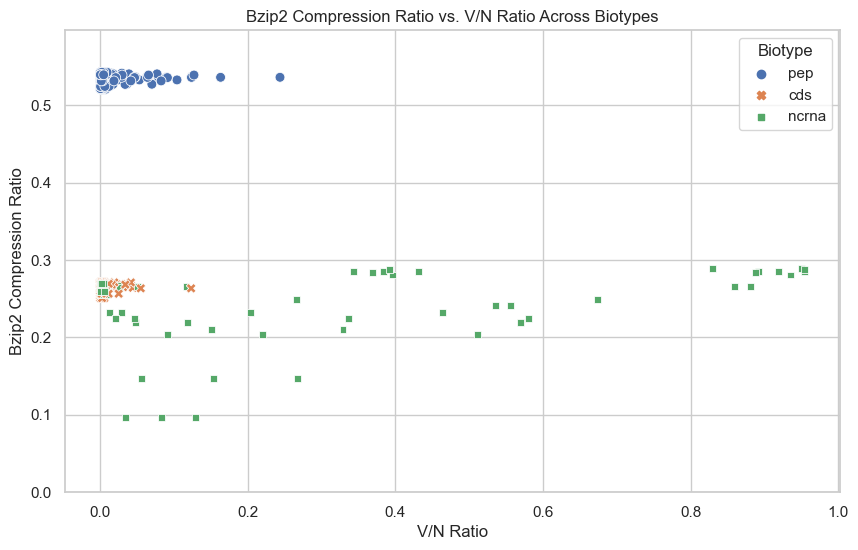

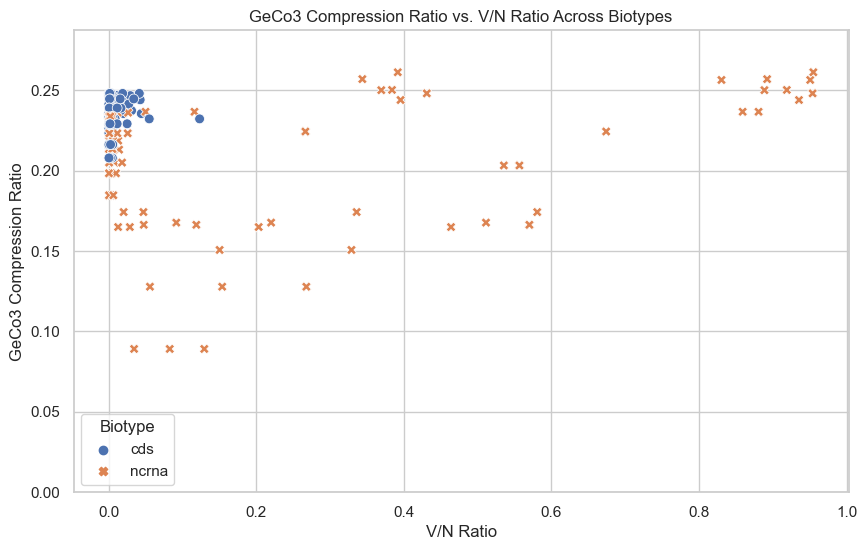

In [35]:
import seaborn as sns
df = df.dropna(subset=["Vocab Size", "Token Count", "Unique Token Count"])


df["Vocab Size"] = df["Vocab Size"].astype(int)
df["Unique Token Count"] = df["Unique Token Count"].astype(int)
df["Token Count"] = df["Token Count"].astype(int)

df["V/N Ratio"] = df["Unique Token Count"] / df["Token Count"]

compression_methods = {
    "Tk Compression Factor": "Tk Compression Ratio",
    "GZIP Ratio": "Gzip Compression Ratio",
    "BZIP2 Ratio": "Bzip2 Compression Ratio",
    "GeCo3 Ratio": "GeCo3 Compression Ratio",
}

sns.set(style="whitegrid")

for method, label in compression_methods.items():
    plt.figure(figsize=(10, 6))
    
    if method == "GeCo3 Ratio":
        subset = df[df["File Type"] != "pep"]
    else:
        subset = df

    sns.scatterplot(
        data=subset, x="V/N Ratio", y=method, hue="File Type", style="File Type", s=50
    )

    #plt.xscale("log")
    min_value = 0.0
    max_value = subset[method].max() * 1.1  # Allow some padding for visibility
    plt.ylim(min_value, max_value)

    plt.xlabel("V/N Ratio")
    plt.ylabel(f"{label}")
    plt.title(f"{label} vs. V/N Ratio Across Biotypes")
    plt.legend(title="Biotype")
    plt.grid(True)

    plt.show()

In [36]:
df = df.dropna(subset=["File Type", "Vocab Size", "Tk Compression Factor"])
df = df.sort_values(by="Vocab Size", ascending=True)
print(df["Vocab Size"].unique())

file_types = df["File Type"].unique()



[  500  1000  5000 10000 18000]


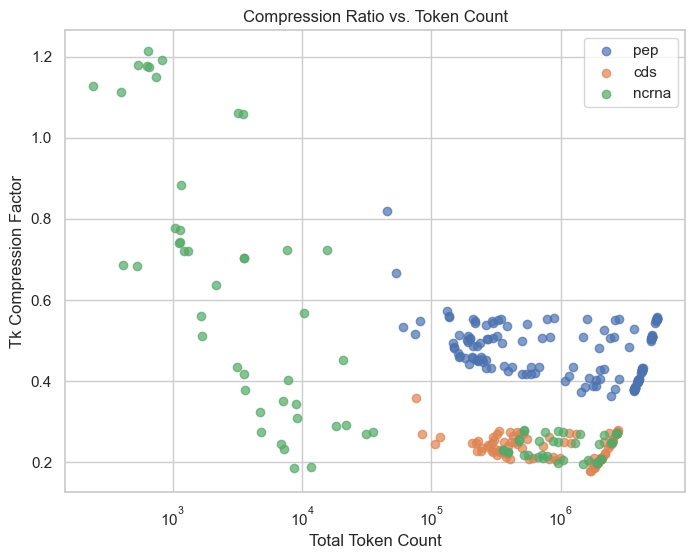

In [39]:

plt.figure(figsize=(8, 6))
for biotype in df["File Type"].unique():
    subset = df[df["File Type"] == biotype]
    plt.scatter(subset["Token Count"], subset["Tk Compression Factor"], label=biotype, alpha=0.7)
plt.xscale("log")
plt.xlabel("Total Token Count")
plt.ylabel("Tk Compression Factor")
plt.title("Compression Ratio vs. Token Count")
plt.legend()
plt.grid(True)
plt.show()

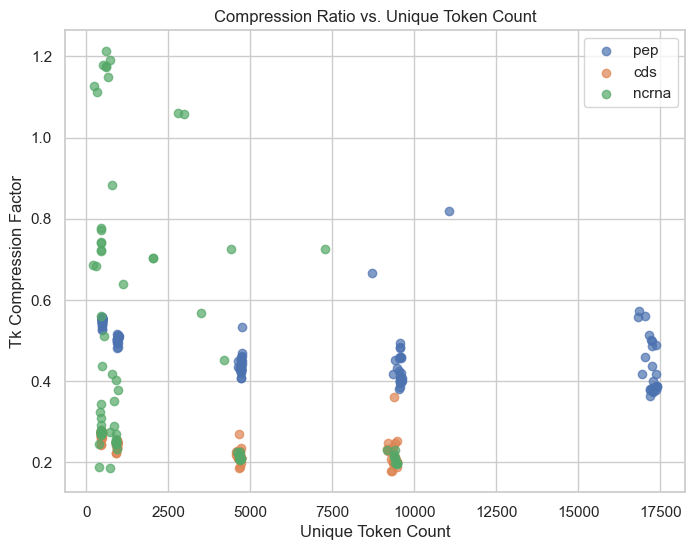

In [40]:
plt.figure(figsize=(8, 6))
for biotype in df["File Type"].unique():
    subset = df[df["File Type"] == biotype]
    plt.scatter(subset["Unique Token Count"], subset["Tk Compression Factor"], label=biotype, alpha=0.7)

plt.xlabel("Unique Token Count")
plt.ylabel("Tk Compression Factor")
plt.title("Compression Ratio vs. Unique Token Count")
plt.legend()
plt.grid(True)
plt.show()

/Users/tiananoll-walker/opt/anaconda3/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/tiananoll-walker/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


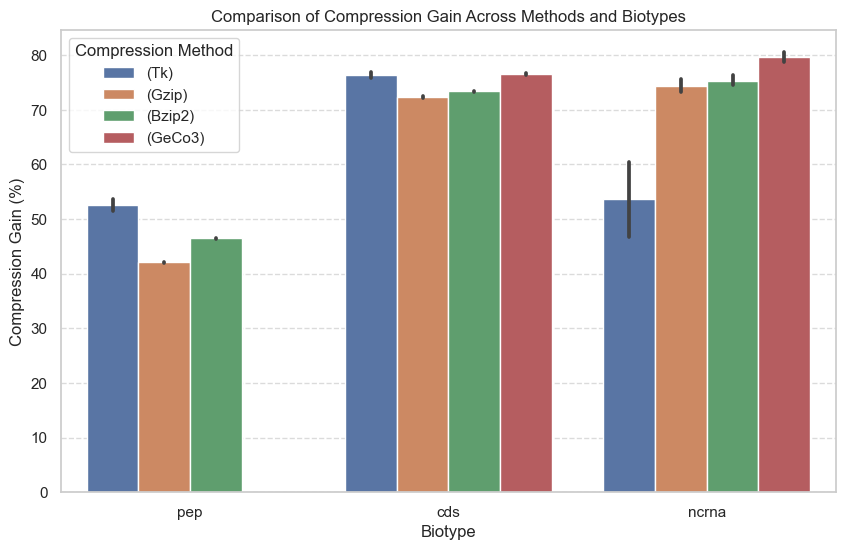

In [41]:
df["Compression Gain (Tk)"] = df["Tk Compression Factor Compression Gain (%)"].astype(float)
df["Compression Gain (Gzip)"] = df["GZIP Ratio Compression Gain (%)"].astype(float)
df["Compression Gain (Bzip2)"] = df["BZIP2 Ratio Compression Gain (%)"].astype(float)
df["Compression Gain (GeCo3)"] = df["GeCo3 Ratio Compression Gain (%)"].astype(float)

df_melted = df.melt(
    id_vars=["File Type"],
    value_vars=["Compression Gain (Tk)", "Compression Gain (Gzip)", "Compression Gain (Bzip2)", "Compression Gain (GeCo3)"],
    var_name="Compression Method",
    value_name="Compression Gain (%)"
)

df_melted["Compression Method"] = df_melted["Compression Method"].str.replace("Compression Gain ", "")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="File Type", y="Compression Gain (%)", hue="Compression Method")

plt.xlabel("Biotype")
plt.ylabel("Compression Gain (%)")
plt.title("Comparison of Compression Gain Across Methods and Biotypes")
plt.legend(title="Compression Method")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

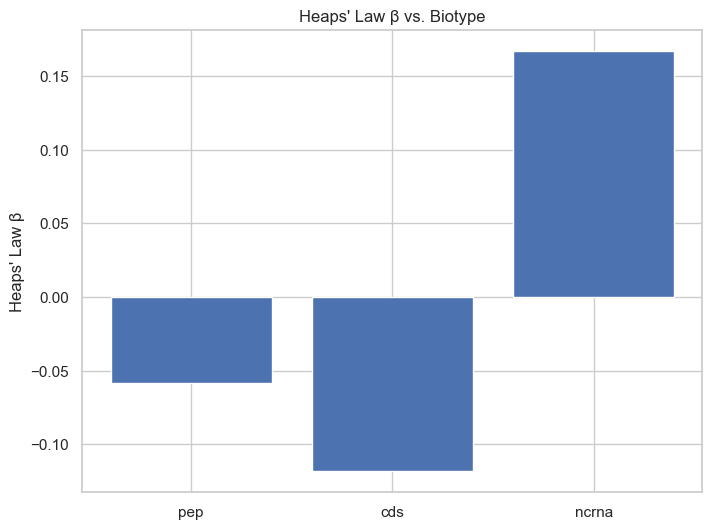

In [42]:
betas = {}
plt.figure(figsize=(8, 6))
for biotype in df["File Type"].unique():
    subset = df[df["File Type"] == biotype]
    popt, _ = curve_fit(heaps_law, subset["Token Count"], subset["Unique Token Count"], maxfev=10000)
    betas[biotype] = popt[1]
plt.bar(betas.keys(), betas.values())
plt.ylabel("Heaps' Law β")
plt.title("Heaps' Law β vs. Biotype")
plt.grid(True)
plt.show()


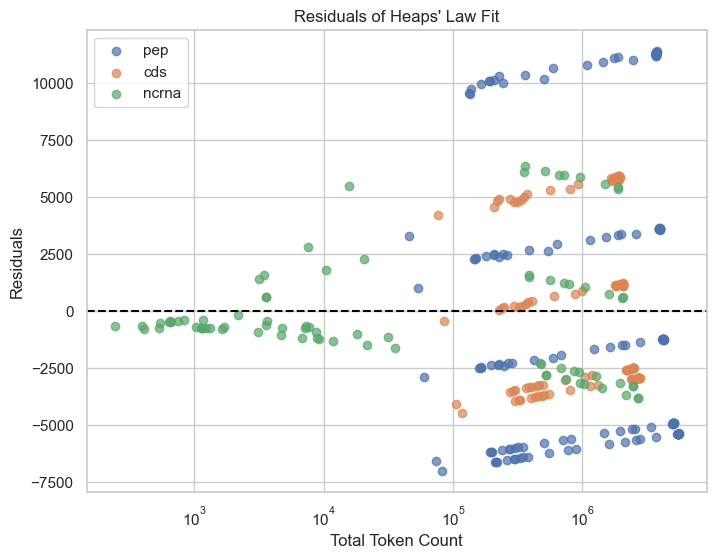

In [43]:
plt.figure(figsize=(8, 6))
for biotype in df["File Type"].unique():
    subset = df[df["File Type"] == biotype]
    popt, _ = curve_fit(heaps_law, subset["Token Count"], subset["Unique Token Count"], maxfev=10000)
    fitted_values = heaps_law(subset["Token Count"], *popt)
    residuals = subset["Unique Token Count"] - fitted_values
    plt.scatter(subset["Token Count"], residuals, label=biotype, alpha=0.7)
plt.axhline(0, linestyle="--", color="black")
plt.xscale("log")
plt.xlabel("Total Token Count")
plt.ylabel("Residuals")
plt.title("Residuals of Heaps' Law Fit")
plt.legend()
plt.grid(True)
#plt.savefig("figures/heaps_residuals.png")
plt.show()

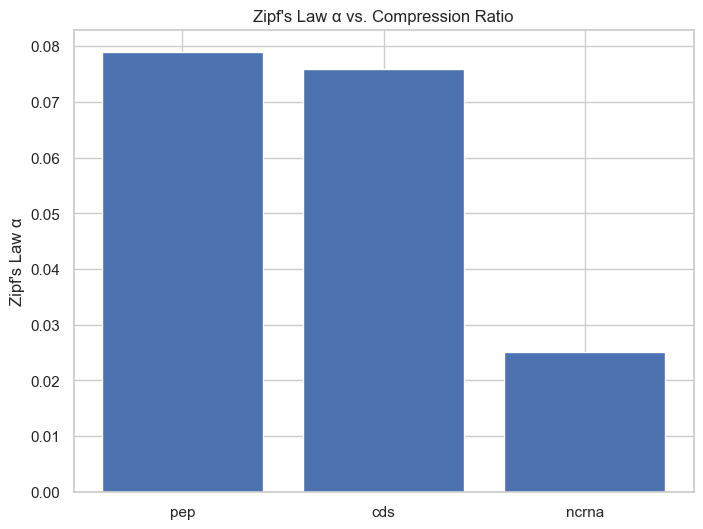

In [52]:
alphas = {}
plt.figure(figsize=(8, 6))
for biotype in df["File Type"].unique():
    subset = df[df["File Type"] == biotype]
    popt, _ = curve_fit(zipfs_law, np.arange(1, len(subset) + 1), subset["Tk Compression Factor"], maxfev=10000)
    alphas[biotype] = popt[1]
plt.bar(alphas.keys(), alphas.values())
plt.ylabel("Zipf's Law α")
plt.title("Zipf's Law α vs. Compression Ratio")
plt.grid(True)
#plt.savefig("figures/zipf_alpha_vs_compression.png")
plt.show()

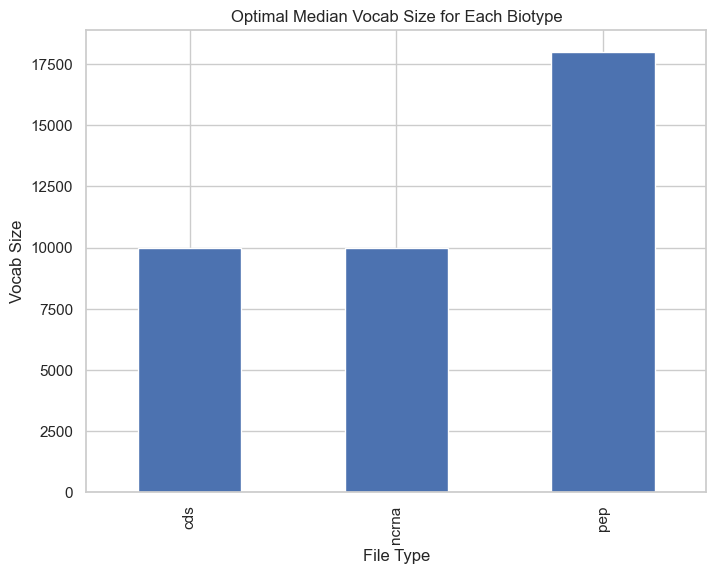

In [45]:
plt.figure(figsize=(8, 6))
optimal_vocab = df.groupby(["File Type", "Vocab Size"])['Tk Compression Factor'].median().unstack()
optimal_vocab.idxmin(axis=1).plot(kind='bar')
plt.ylabel("Vocab Size")
plt.title("Optimal Median Vocab Size for Each Biotype")
plt.grid(True)
#plt.savefig("figures/optimal_vocab_size.png")
plt.show()

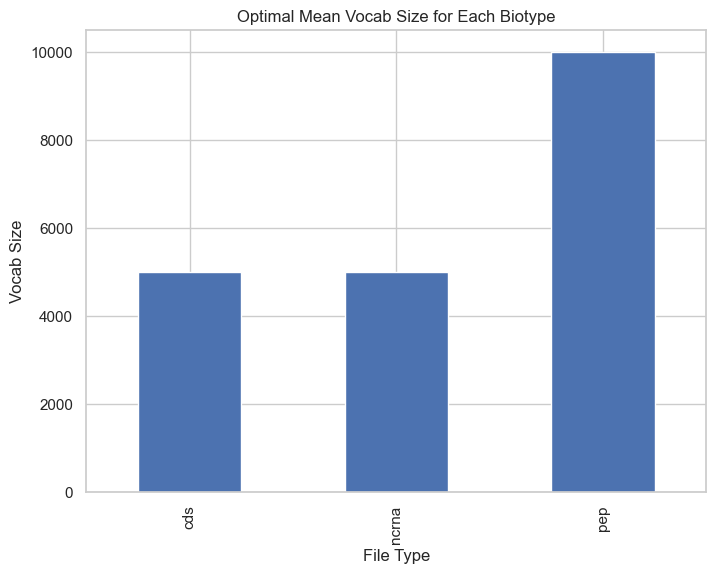

In [46]:
plt.figure(figsize=(8, 6))
optimal_vocab = df.groupby(["File Type", "Vocab Size"])['Tk Compression Factor'].mean().unstack()
optimal_vocab.idxmin(axis=1).plot(kind='bar')
plt.ylabel("Vocab Size")
plt.title("Optimal Mean Vocab Size for Each Biotype")
plt.grid(True)
#plt.savefig("figures/optimal_vocab_size.png")
plt.show()

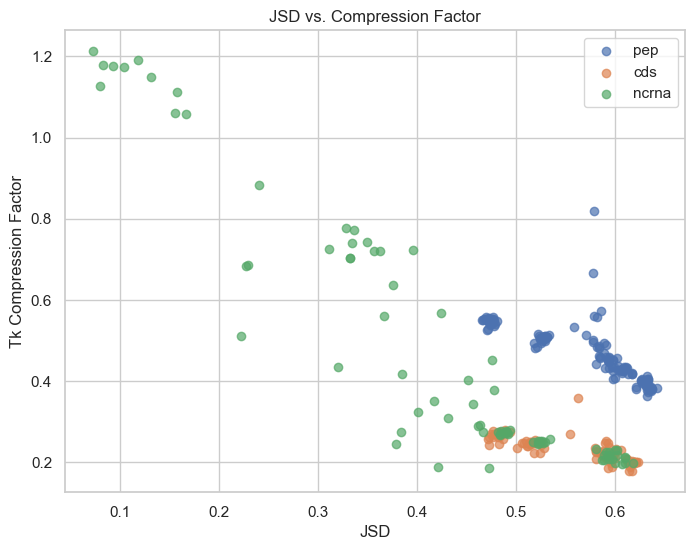

In [47]:
plt.figure(figsize=(8, 6))
for biotype in df["File Type"].unique():
    subset = df[df["File Type"] == biotype]
    plt.scatter(subset["JSD"], subset["Tk Compression Factor"], label=biotype, alpha=0.7)
plt.xlabel("JSD")
plt.ylabel("Tk Compression Factor")
plt.title("JSD vs. Compression Factor")
plt.legend()
plt.grid(True)
#plt.savefig("figures/jsd_vs_compression.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


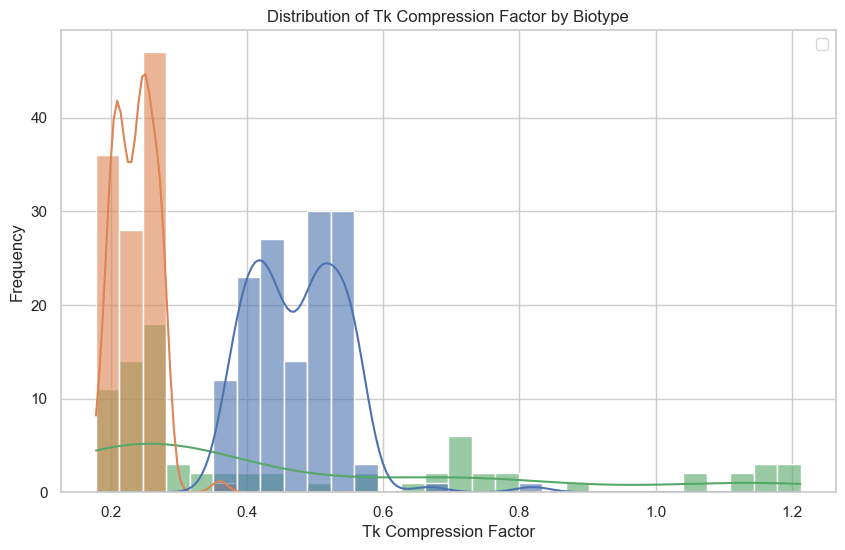

In [48]:

plt.figure(figsize=(10, 6))
sns.histplot(df, x="Tk Compression Factor", hue="File Type", bins=30, kde=True, alpha=0.6)

plt.xlabel("Tk Compression Factor")
plt.ylabel("Frequency")
plt.title("Distribution of Tk Compression Factor by Biotype")
plt.legend()
plt.grid(True)

plt.show()

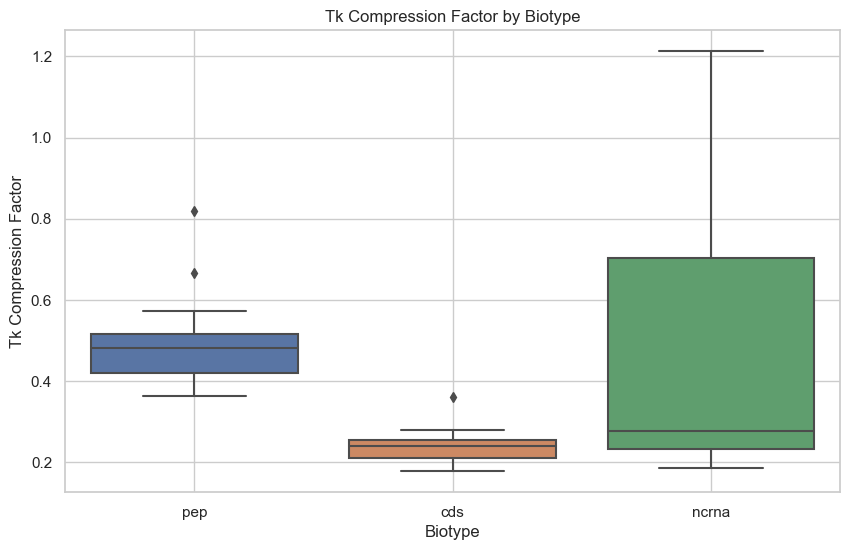

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="File Type", y="Tk Compression Factor")

plt.xlabel("Biotype")
plt.ylabel("Tk Compression Factor")
plt.title("Tk Compression Factor by Biotype")
plt.grid(True)

plt.show()

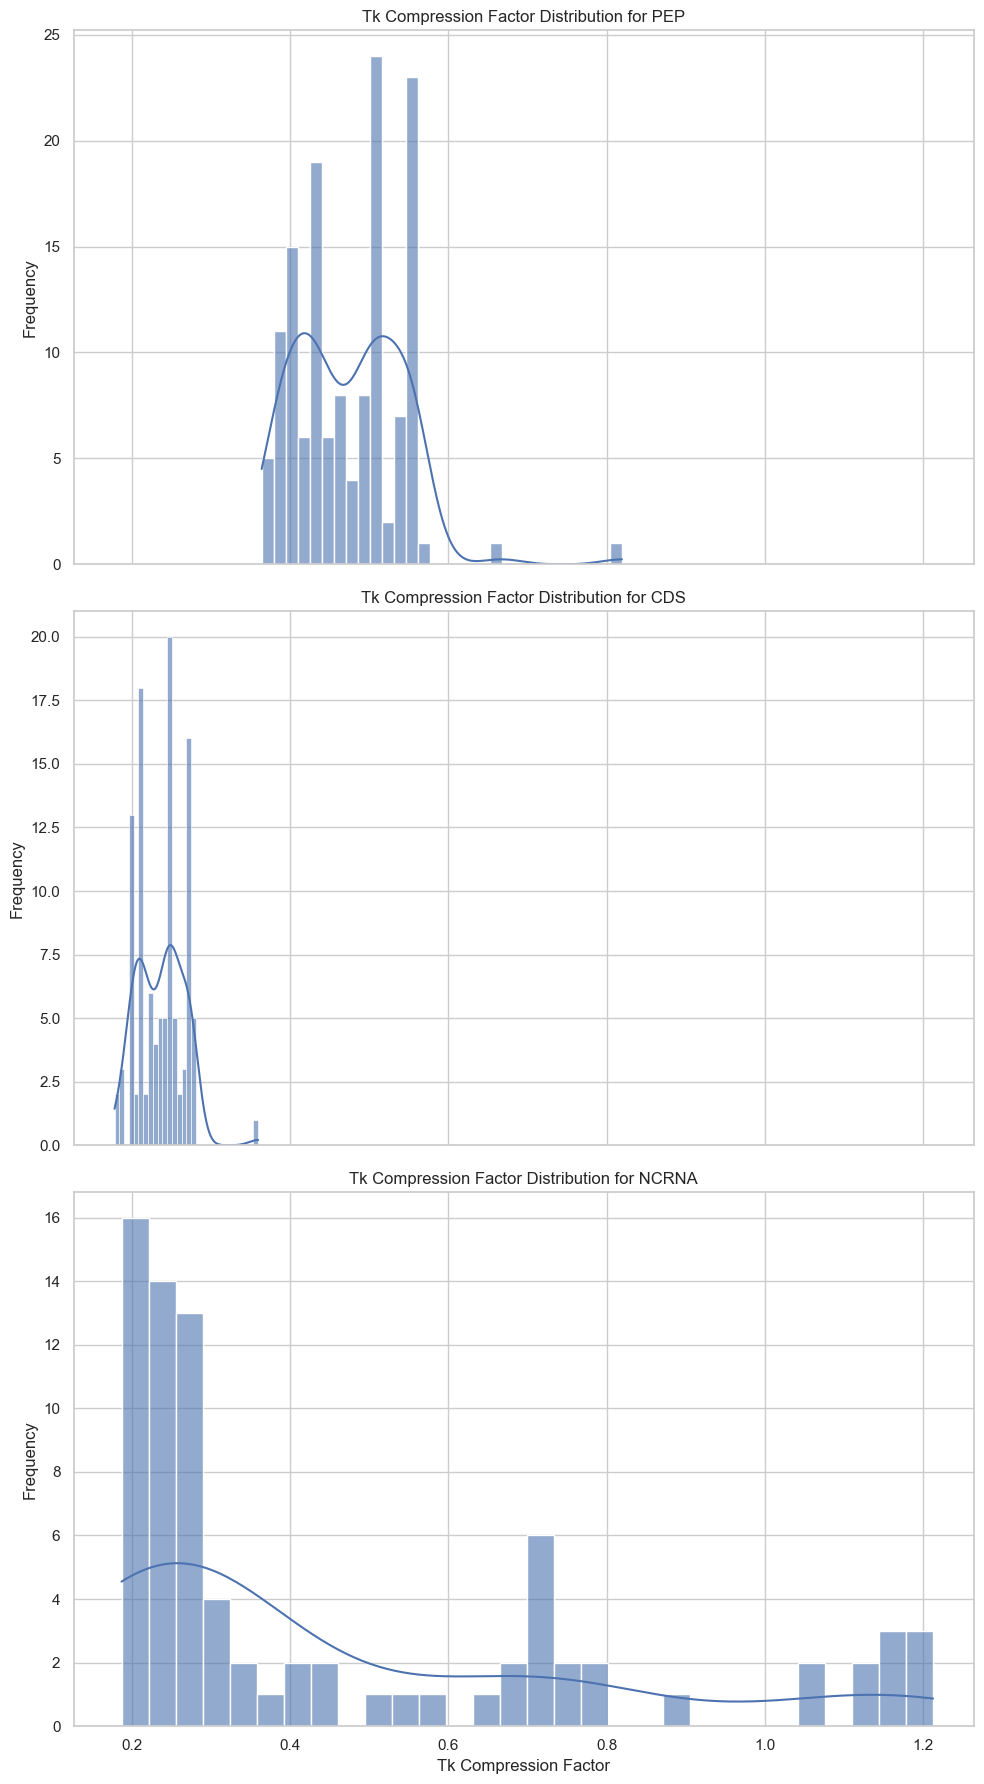

In [50]:
biotypes = df["File Type"].unique()

fig, axes = plt.subplots(len(biotypes), 1, figsize=(10, 6 * len(biotypes)), sharex=True)

for i, biotype in enumerate(biotypes):
    subset = df[df["File Type"] == biotype]
    
    sns.histplot(subset["Tk Compression Factor"], bins=30, kde=True, ax=axes[i], alpha=0.6)
    axes[i].set_title(f"Tk Compression Factor Distribution for {biotype.upper()}")
    axes[i].set_xlabel("Tk Compression Factor")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

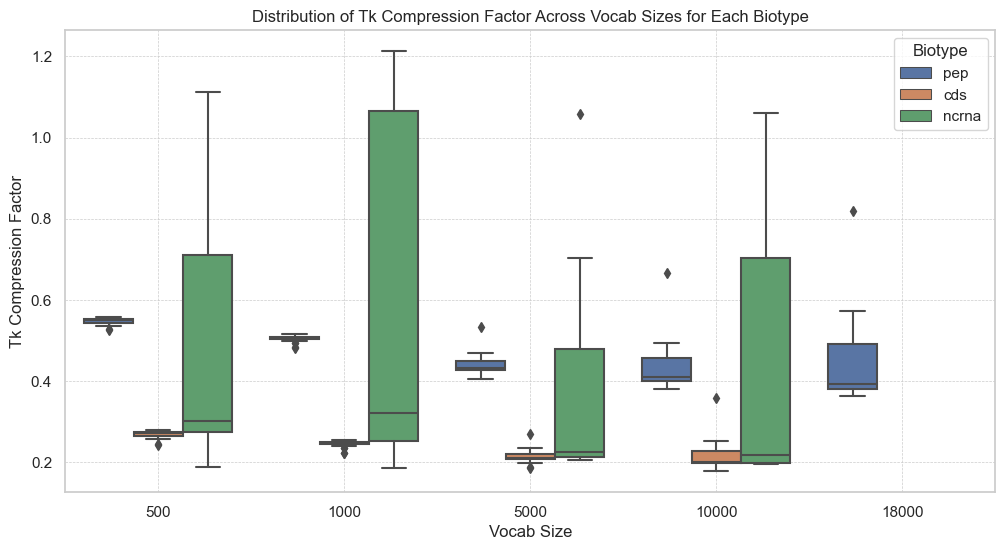

In [51]:

df["Vocab Size"] = df["Vocab Size"].astype(int)
df = df.sort_values(by="Vocab Size", ascending=True)

df["Vocab Size"] = df["Vocab Size"].astype(str)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Vocab Size", y="Tk Compression Factor", hue="File Type")

plt.xlabel("Vocab Size")
plt.ylabel("Tk Compression Factor")
plt.title("Distribution of Tk Compression Factor Across Vocab Sizes for Each Biotype")
plt.legend(title="Biotype")
plt.grid(True, linestyle="--", linewidth=0.5)

plt.show()

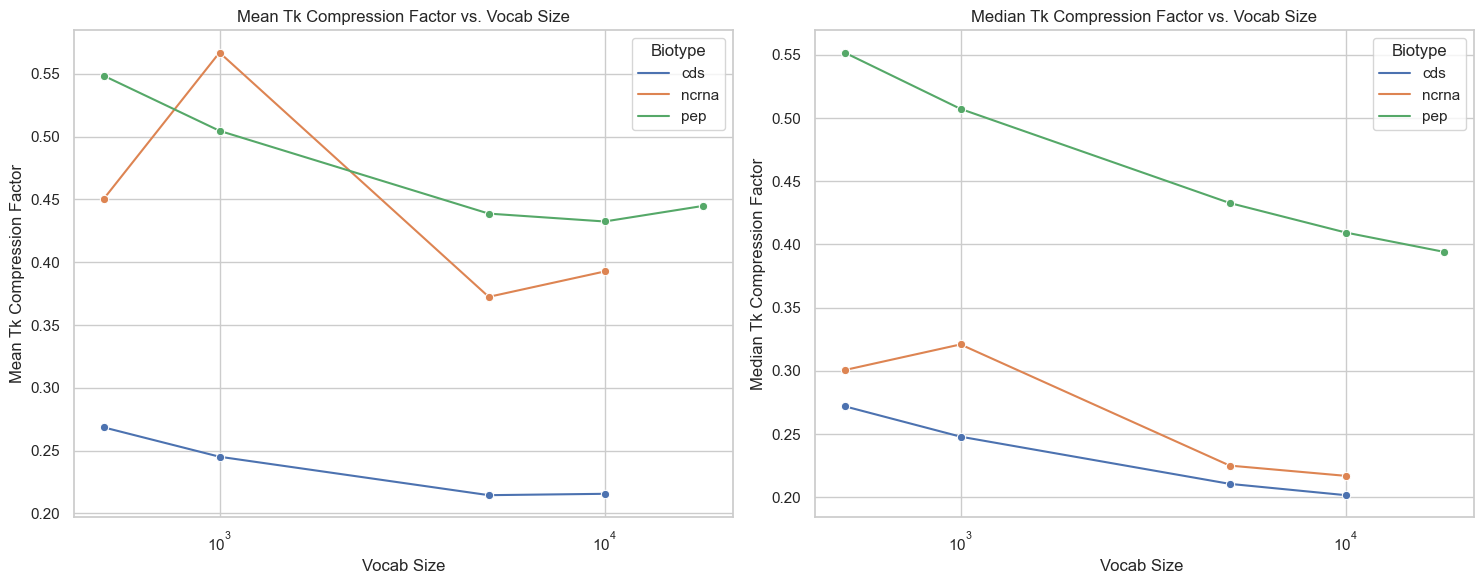

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df["Vocab Size"] = df["Vocab Size"].astype(int)
df = df.sort_values(by="Vocab Size", ascending=True)

agg_metrics = df.groupby(["Vocab Size", "File Type"]).agg(
    mean_tk_compression=("Tk Compression Factor", "mean"),
    median_tk_compression=("Tk Compression Factor", "median")
).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.lineplot(
    data=agg_metrics, x="Vocab Size", y="mean_tk_compression", hue="File Type", marker="o", ax=axes[0]
)
axes[0].set_xscale("log")  
axes[0].set_xlabel("Vocab Size")
axes[0].set_ylabel("Mean Tk Compression Factor")
axes[0].set_title("Mean Tk Compression Factor vs. Vocab Size")
axes[0].legend(title="Biotype")
axes[0].grid(True)

sns.lineplot(
    data=agg_metrics, x="Vocab Size", y="median_tk_compression", hue="File Type", marker="o", ax=axes[1]
)
axes[1].set_xscale("log")  
axes[1].set_xlabel("Vocab Size ")
axes[1].set_ylabel("Median Tk Compression Factor")
axes[1].set_title("Median Tk Compression Factor vs. Vocab Size")
axes[1].legend(title="Biotype")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [63]:
df["Vocab Size"] = df["Vocab Size"].astype(int)
df = df.sort_values(by="Vocab Size", ascending=True)

agg_metrics = df.groupby(["Vocab Size", "File Type"]).agg(
    mean_tk_compression_factor=("Tk Compression Factor", "mean"),
    median_tk_compression_factor=("Tk Compression Factor", "median")
).reset_index()

optimal_vocab_mean = agg_metrics.loc[
    agg_metrics.groupby("File Type")["mean_tk_compression_factor"].idxmin(),
    ["File Type", "Vocab Size", "mean_tk_compression_factor"]
]

optimal_vocab_median = agg_metrics.loc[
    agg_metrics.groupby("File Type")["median_tk_compression_factor"].idxmin(),
    ["File Type", "Vocab Size", "median_tk_compression_factor"]
]
print(optimal_vocab_mean)
print(optimal_vocab_median)


   File Type  Vocab Size  mean_tk_compression_factor
6        cds        5000                    0.214585
7      ncrna        5000                    0.372429
11       pep       10000                    0.432418
   File Type  Vocab Size  median_tk_compression_factor
9        cds       10000                      0.201682
10     ncrna       10000                      0.216974
12       pep       18000                      0.394147


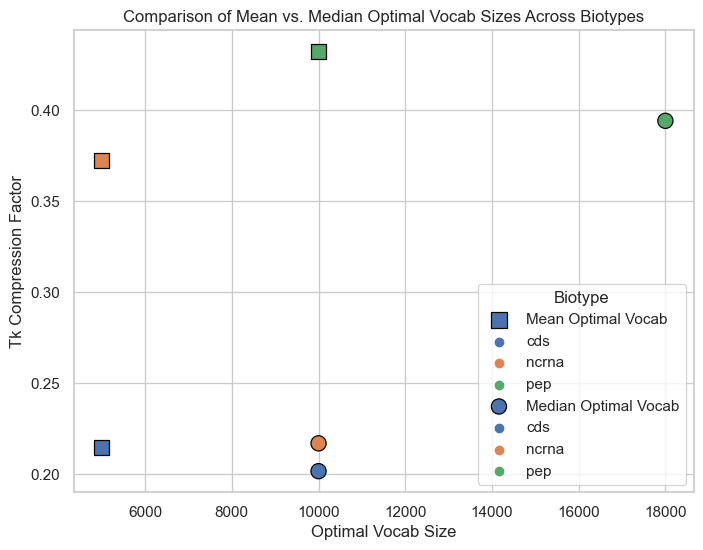

In [66]:
#from the above results
optimal_vocab_median = pd.DataFrame({
    "File Type": ["cds", "ncrna", "pep"],
    "Vocab Size": [10000, 10000, 18000],
    "Tk Compression Factor": [0.201682, 0.216974, 0.394147]
})

optimal_vocab_mean = pd.DataFrame({
    "File Type": ["cds", "ncrna", "pep"],
    "Vocab Size": [5000, 5000, 10000],
    "Tk Compression Factor": [0.214585, 0.372429, 0.432418]
})

plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=optimal_vocab_mean, x="Vocab Size", y="Tk Compression Factor",
    hue="File Type", marker="s", s=120, edgecolor="black", label="Mean Optimal Vocab"
)

sns.scatterplot(
    data=optimal_vocab_median, x="Vocab Size", y="Tk Compression Factor",
    hue="File Type", marker="o", s=120, edgecolor="black", label="Median Optimal Vocab"
)

plt.xlabel("Optimal Vocab Size")
plt.ylabel("Tk Compression Factor")
plt.title("Comparison of Mean vs. Median Optimal Vocab Sizes Across Biotypes")
plt.legend(title="Biotype", loc="lower right")
plt.grid(True)

plt.show()